# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [77]:
#Running initial example first to find location for each parameter
main_url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"{main_url}appid={weather_api_key}&q="
city = "Melbourne"
response = requests.get(url + city)
responce_json = response.json()
print(json.dumps(responce_json, indent=4, sort_keys=True))

city_lat = responce_json["coord"]["lat"]
print(city_lat)
city_lng = responce_json["coord"]["lon"]
print(city_lng)
city_max_temp = responce_json["main"]["temp_max"]
print(city_max_temp)
city_humidity = responce_json["main"]["humidity"]
print (city_humidity)
city_clouds = responce_json["clouds"]["all"]
print(city_clouds)
city_wind = responce_json["wind"]["speed"]
print(city_wind)
city_country = responce_json["sys"]["country"]
print(city_country)

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 28.0836,
        "lon": -80.6081
    },
    "dt": 1688808240,
    "id": 4163971,
    "main": {
        "feels_like": 298.87,
        "humidity": 90,
        "pressure": 1013,
        "temp": 297.98,
        "temp_max": 299.24,
        "temp_min": 296.49
    },
    "name": "Melbourne",
    "sys": {
        "country": "US",
        "id": 2007578,
        "sunrise": 1688812323,
        "sunset": 1688862150,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 5.14
    }
}
28.0836
-80.6081
299.24
90
0
5.14
US


### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
main_url = "http://api.openweathermap.org/data/2.5/weather?"
#declaring units as metrics
units = "metric"
#url
url = f"{main_url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
today = datetime.today().strftime('%d-%m-%Y')

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    response = requests.get(city_url)
    #print(json.dumps(response_json, indent=4, sort_keys=True))
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(json.dumps(city_weather, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        #print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        #print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
        #print(city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
        #print (city_humidity)
        city_clouds = city_weather["clouds"]["all"]
        #print(city_clouds)
        city_wind = city_weather["wind"]["speed"]
        #print(city_wind)
        city_country = city_weather["sys"]["country"]
        #print(city_country)
        city_date = today

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | cody
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | tralee
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | qoryooley
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | puerto deseado
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | swakopmund
Processing Record 17 of Set 1 | del rio
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Se

Processing Record 39 of Set 4 | san jose del cabo
Processing Record 40 of Set 4 | cova figueira
Processing Record 41 of Set 4 | shiguai
Processing Record 42 of Set 4 | greymouth
Processing Record 43 of Set 4 | jilib
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | soio
Processing Record 47 of Set 4 | bafq
Processing Record 48 of Set 4 | jumla
Processing Record 49 of Set 4 | sudden valley
Processing Record 0 of Set 5 | wanganui
Processing Record 1 of Set 5 | badger
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | santa cruz
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | porangatu
Processing Record 6 of Set 5 | al ghayzah
Processing Record 7 of Set 5 | vredenburg
City not found. Skipping...
Processing Record 8 of Set 5 | palikir - national government center
Processing Record 9 of Set 5 | egilsstadir
Processing Record 10 of Set 5 | invercargill
Processing Record 11 of Set 5 | new

Processing Record 29 of Set 8 | levuka
Processing Record 30 of Set 8 | fort bragg
Processing Record 31 of Set 8 | bay harbor
Processing Record 32 of Set 8 | cortez
Processing Record 33 of Set 8 | los teques
Processing Record 34 of Set 8 | geraldton
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | san julian
Processing Record 37 of Set 8 | santo antonio do ica
Processing Record 38 of Set 8 | ponnamaravati
Processing Record 39 of Set 8 | spassk
Processing Record 40 of Set 8 | ilhabela
Processing Record 41 of Set 8 | pamandzi
Processing Record 42 of Set 8 | awjilah
Processing Record 43 of Set 8 | rudsar
Processing Record 44 of Set 8 | sarmiento
Processing Record 45 of Set 8 | diamond springs
Processing Record 46 of Set 8 | prado
Processing Record 47 of Set 8 | nadvoitsy
Processing Record 48 of Set 8 | fort mcmurray
Processing Record 49 of Set 8 | toga village
City not found. Skipping...
Processing Record 0 of Set 9 | crane
Processing Record 1 of Set 9 | broome
Pro

Processing Record 19 of Set 12 | mokameh
Processing Record 20 of Set 12 | chulym
Processing Record 21 of Set 12 | iola
Processing Record 22 of Set 12 | pangody
Processing Record 23 of Set 12 | andovoranto
Processing Record 24 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | ghatsila
Processing Record 27 of Set 12 | armidale
Processing Record 28 of Set 12 | quibala
Processing Record 29 of Set 12 | san andres
Processing Record 30 of Set 12 | okha
Processing Record 31 of Set 12 | marsaskala
City not found. Skipping...
Processing Record 32 of Set 12 | o rosal
Processing Record 33 of Set 12 | lodwar
Processing Record 34 of Set 12 | oamaru
Processing Record 35 of Set 12 | gizo
Processing Record 36 of Set 12 | kili
Processing Record 37 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 12 | axim
Processing Record 39 of Set 12 | brookings
Processing Record 40 of Set 12 | manismata
Process

In [80]:
#print(city_data)
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,21.02,30,5,6.89,RU,08-07-2023
1,cody,44.5263,-109.0565,13.34,78,0,2.57,US,08-07-2023
2,stanley,54.8680,-1.6985,25.85,54,20,2.57,GB,08-07-2023
3,edinburgh of the seven seas,-37.0676,-12.3116,13.83,81,88,9.61,SH,08-07-2023
4,tralee,52.2704,-9.7026,16.14,77,40,5.66,IE,08-07-2023


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,21.02,30,5,6.89,RU,08-07-2023
1,cody,44.5263,-109.0565,13.34,78,0,2.57,US,08-07-2023
2,stanley,54.8680,-1.6985,25.85,54,20,2.57,GB,08-07-2023
3,edinburgh of the seven seas,-37.0676,-12.3116,13.83,81,88,9.61,SH,08-07-2023
4,tralee,52.2704,-9.7026,16.14,77,40,5.66,IE,08-07-2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

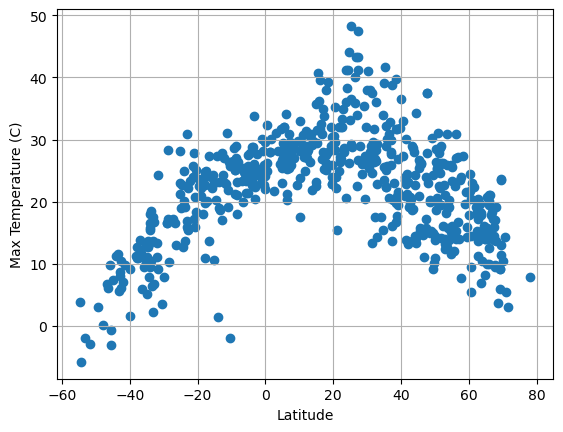

In [86]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

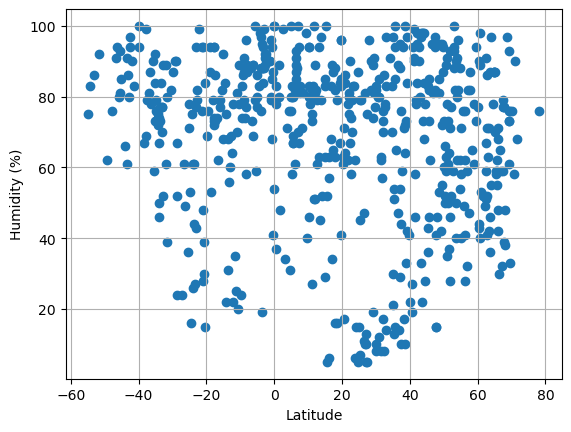

In [87]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

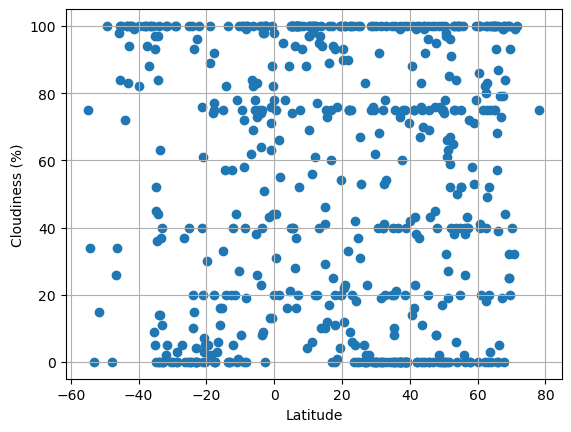

In [106]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

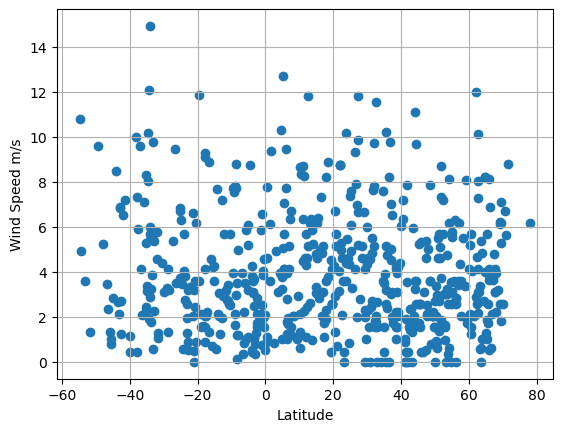

In [89]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] > 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,21.02,30,5,6.89,RU,08-07-2023
1,cody,44.5263,-109.0565,13.34,78,0,2.57,US,08-07-2023
2,stanley,54.8680,-1.6985,25.85,54,20,2.57,GB,08-07-2023
4,tralee,52.2704,-9.7026,16.14,77,40,5.66,IE,08-07-2023
5,kavaratti,10.5669,72.6420,28.15,78,100,8.35,IN,08-07-2023


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,13.83,81,88,9.61,SH,08-07-2023
7,mount gambier,-37.8333,140.7667,10.98,69,100,7.33,AU,08-07-2023
8,adamstown,-25.0660,-130.1015,21.27,71,100,6.84,PN,08-07-2023
11,blackmans bay,-43.0167,147.3167,8.07,86,83,6.84,AU,08-07-2023
13,puerto deseado,-47.7503,-65.8938,0.10,76,0,5.23,AR,08-07-2023


###  Temperature vs. Latitude Linear Regression Plot

y = -0.25x + 33.37
The correlation between Max Temp and Latitude is: 0.37478


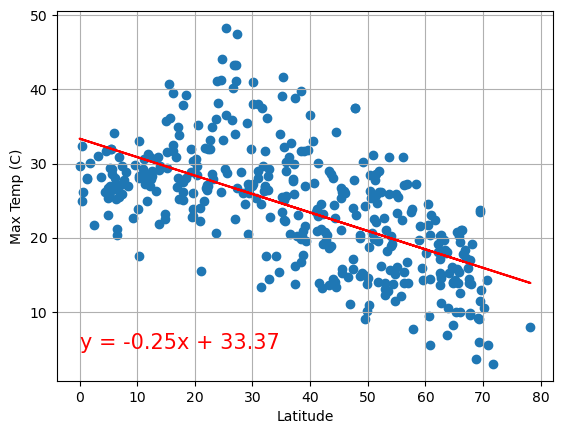

In [121]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()
print(line_eq)
print(f"The correlation between Max Temp and Latitude is: {round(rvalue**2, 5)}")
plt.show()

y = 0.46x + 27.83
The correlation between between Max Temp and Latitude is: 0.6385


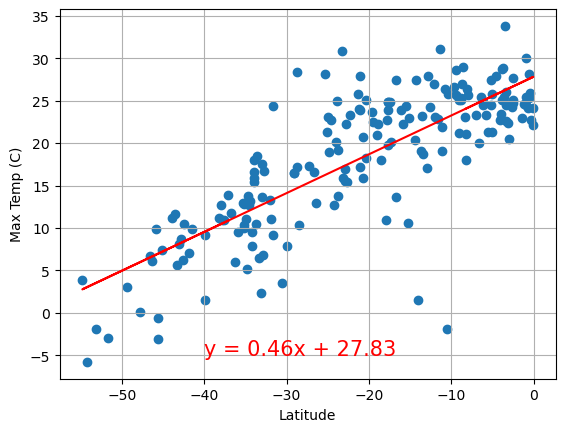

In [122]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-40,-5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()
print(line_eq)
print(f"The correlation between between Max Temp and Latitude is: {round(rvalue**2, 5)}")
plt.show()

**Discussion about the linear relationship:** 
    In General Max Temp decreases as the latitude moves away from the equator
    The correlation for Max temp vs latitude in the southern hemisphere is stronger than the same for the northern hemisphere
    by roughly a factor of 2. Both correlation coafficients, however, are not strong to conclude a good relationship. 
    The temp range covered in north (0 to 50) is wider than in the rnage coverd in south (-5 to 35)
    The scatter around the strightline in both cases is wide. The scatter around the straighline in the north is more than in the south. There other factors, such as elevation above mean sea level, that control Temp.
    Liner relationship does not reflect the relationship between Max Temp and Latitude.

### Humidity vs. Latitude Linear Regression Plot

y = -0.05x + 67.44
The correlation between Humidity and Latitude is: 0.00149


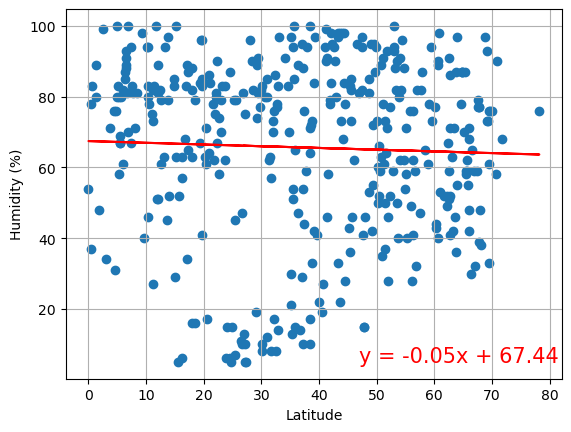

In [123]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(47,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(line_eq)
print(f"The correlation between Humidity and Latitude is: {round(rvalue**2, 5)}")
plt.show()

y = 0.05x + 74.91
The correlation between Humidity and Latitude is: 0.00109


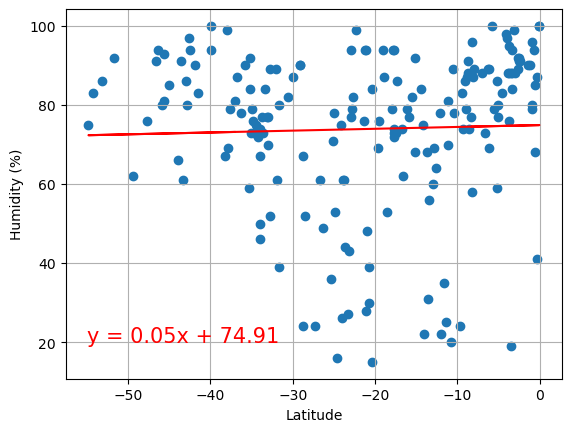

In [124]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(line_eq)
print(f"The correlation between Humidity and Latitude is: {round(rvalue**2, 5)}")
plt.show()

**Discussion about the linear relationship:
    Too much visable scatter around straightline for both northern and southern hemisphere
    extermely week correlation coefficient in both regions, 
    it is safe to say that there is no relationship between Humidity and Latitude in both region when using straighlines.
    Looking at the graphs, I do not think it is possible to find a relationship using traditional liner or non-liner regression.
    This is a good candidate for a Neural Network study.

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.06x + 56.67
The correlation between Cloudiness and Latitude is: 0.00088


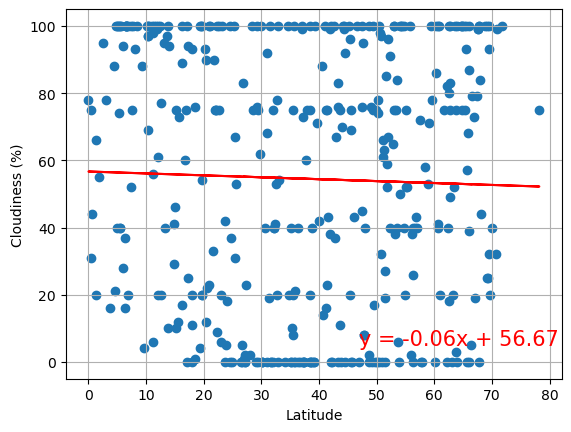

In [126]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(47,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(line_eq)
print(f"The correlation between Cloudiness and Latitude is: {round(rvalue**2, 5)}")
plt.show()

y = -0.01x + 50.88
The correlation between Cloudiness and Latitude is: 1e-05


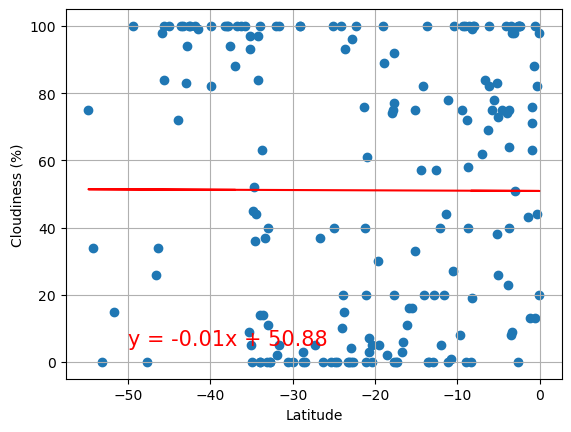

In [125]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(line_eq)
print(f"The correlation between Cloudiness and Latitude is: {round(rvalue**2, 5)}")
plt.show()

**Discussion about the linear relationship:** 
    Too much visable scatter around straightline for both northern and southern hemisphere
    extermely week correlation coefficient in both regions, 
    it is safe to say that there is no relationship between Cloudiness and Latitude in both region when using straighlines.
    Again, other factors should be considerd to determin a relationship between Cloudiness and Latitude.
    Looking at the graphs, I do not think it is possible to find a relationship using traditional liner or non-liner regression.
    This is a good candidate for a Neural Network study.
    

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.01x + 4.4
The correlation between Wind Speed and Latitude is: 0.01068


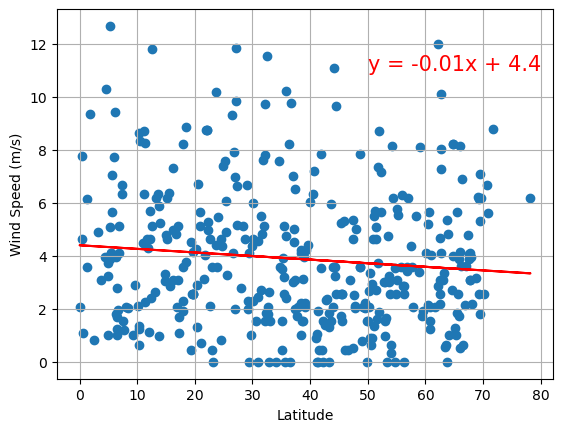

In [127]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(50,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
print(line_eq)
print(f"The correlation between Wind Speed and Latitude is: {round(rvalue**2, 5)}")
plt.show()

y = -0.05x + 2.86
The correlation between Wind Speed and Latitude is: 0.0543


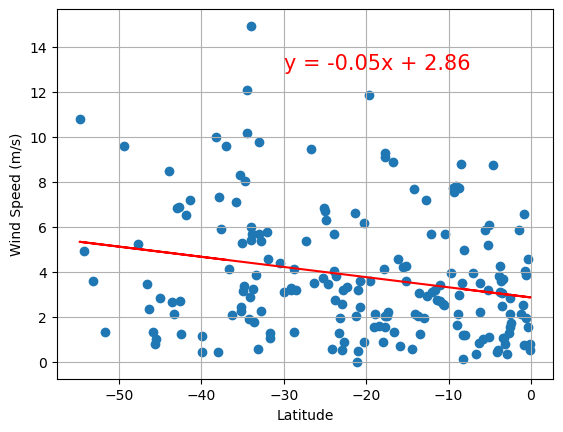

In [128]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-30,13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
print(line_eq)
print(f"The correlation between Wind Speed and Latitude is: {round(rvalue**2, 5)}")
plt.show()

**Discussion about the linear relationship:** 
    Too much visable scatter around straightline for both northern and southern hemisphere
    extermely week correlation coefficient in both regions, 
    it is safe to say that there is no relationship between Wind Speed and Latitude in both region when using straighlines.
    Looking at the graphs, I do not think it is possible to find a relationship using traditional liner or non-liner regression.
    This is a good candidate for a Neural Network study.